# Applied Statistics: Lab 3

## Question 1

### Introduction
The central limit theorem (CLT) states that, in general, for independent and identically distributed random variables, the sampling distribution of the _standardised_ sample mean* tends towards the standard normal distribution (even if the original variables themselves are not normally distributed) [1]. Hence, we can say that the sampling distribution of a sample mean is _approximately_ normal if the sample size (per sample mean calculation) is large enough, even if the population distribution is not normal. The meaning of "large enough" depends on the context [2].

\* _Standardised_ $\implies$ _subtracted by the mean (in this case, the mean of sample means) and divided by the distribution standard deviation (in this case, the standard deviation of sample means)_.

---

**Formal definition**:<br>Let $P$ denote the probability measure defined on a set $X$ (hence, given the particular case, indirectly representing a particular probability distribution). Hence, the product measure $P_N = P \bigotimes P ... \bigotimes P$ ($N$ times) defines the joint probability measure for the set of all tuples of $N$ elements of $X$. Let $\bar P_N$ denote the pushforward of the aforementioned product measure $P_N$ through the sample mean function $m$ (which maps a tuple of $N$ values to a their mean), i.e. $\bar P_N = m_* P_N$. Hence, $\bar P_N$ is the probability measure defined on the set of the means of every tuple of $N$ elements of $X$, i.e. it represents the probability distribution of sample means (given the sample size of $N$ and population $X$). Let $\mu (P)$ denote the true (i.e. theoretical) mean of the distribution represented by $P$, given the particular case, and let $Var(P)$ denote this distribution's true (i.e. theoretical) variance. Finally, let $Norm(\mu, \sigma ^2)$ denote the normal distribution with mean $\mu$ and standard deviation $\sigma$ (or variance $\sigma ^2$). Given these definitions, the central limit theorem states that:

$\sqrt{N}(\bar P_N - \mu(P)) \rightarrow Norm(0, Var(P))$ given $N \rightarrow \infty$

$
\implies (\bar P_N - \mu(P)) \rightarrow  Norm(0, \frac{Var(P)}{\sqrt{N} ^2})
$

$
\implies \bar P_N \rightarrow  Norm(\mu(P), \frac{Var(P)}{N})
$

Given that the distribution in question is the t-distribution, denoted here as $t(x), x \in X$, we know that $\mu(P)=0$ (since the true mean of any t-distribution is $0$). Hence, denoting the joint distribution of any tuple of any $N$ values from the t-distribution as $t(x)_N$, we have that:

$
m_* {t(x)}_N → Norm(0, \frac{Var(t(x))}{N})$ given $N \rightarrow \infty$
$

In other words, the distribution of the sample means of t-distribution samples of size $N$ approaches $Norm(0, \frac{Var(t(x))}{N})$ as $ N \rightarrow \infty$. We shall demonstrate this fact in the following code. For this question, we have fixed $k=3$.

> REFERENCES:
> - [1]: https://en.wikipedia.org/wiki/Central_limit_theorem
> - [2]: https://www.statology.org/central-limit-theorem/

---

### Practical demonstration
**USEFUL FORMULA**: $Var(t(x))=\frac{k}{k-2}$, where $k$ is the degrees of freedom for the distribution. Hence, the variance of the approximated distribution of sample means of the samples of $N$ t-distributions is $\frac{Var(t(x))}{N}=\frac{k}{N(k-2)}$.

In [1]:
import matplotlib.pyplot as plt
from scipy.stats import t, norm
import numpy as np

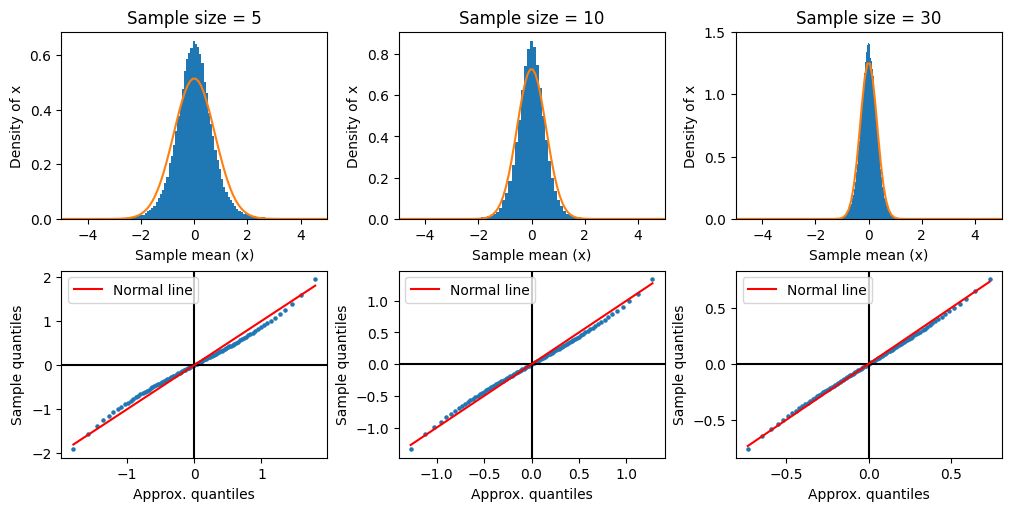

In [2]:
fig, axs = plt.subplots(2, 3, constrained_layout=True, figsize=(10, 5))
N = [5, 10, 30] # Sample sizes
size = 100000   # Number of samples to draw
storage = []

# True variance of distribution of sample means:
var = lambda k, N: k/(N*(k-2))

for n in N:
  # Drawing samples:
  """
  For the following, note:
  - We fix the degrees of freedom (df) at 3
  - We generate `size` number of samples each of size `n`
  - The sample of samples will be in the form of a `size` x `n` matrix
  - We obtain the row-wise means of each set of samples
  - The sample of means will be in the form of a `size` x 1 vector
  """
  storage.append(np.mean(t.rvs(df=3, size=(size, n)), axis=1))
  """
  Note on `numpy.mean`:
  - numpy.mean(<array>, axis=0) for column-wise means
  - numpy.mean(<array>, axis=1) for row-wise means
  - numpy.mean(<array>) for mean of all values (mean of flattened array)
  """

#================================================

# Plotting densities of sample means:
x = np.linspace(-5, 5, 100)
for i in range(3):
  # 1. Plotting the frequency-based densities (sample densities):
  axs[0][i].hist(storage[i], bins=300, density=True)
  """
  Note on the optional argument `density=True`:
  If `density=True`, the histogram function draws and returns a frequency
  density (an approximate of the probability density): each bin will display the
  bin's raw count divided by the total number of counts times the bin width:
  ```
  density = counts / (sum(counts) * np.diff(bins)))
  ```
  This is done so that the area under the histogram integrates to 1; hence, we
  approximate the probability density curve using the data.
  """
  # 2. Overlaying the above with a plot of the expected probability densities:
  axs[0][i].plot(x, norm.pdf(x, loc=0, scale=np.sqrt(var(3, N[i]))))
  axs[0][i].set_xlim(-5, 5)
  # Detailing the plot:
  axs[0][i].set_title(f"Sample size = {N[i]}")
  axs[0][i].set_xlabel("Sample mean (x)")
  axs[0][i].set_ylabel("Density of x")

#================================================

# Plotting the Q-Q plots
# Getting the percentiles of the samples:
sampleQs = np.array([np.quantile(storage, i/100, axis=1) for i in range(101)])
# Plotting the Q-Q plots:
for i in range(3):
  # Getting the percentiles of the approximate (theoretical) distribution:
  s = np.sqrt(var(3, N[i])) # Standard deviation of theoretical distribution
  approxQs = [norm.ppf(j/100, loc=0, scale=s) for j in range(101)]
  # Plotting the Q-Q plot:
  axs[1][i].axhline(y=0, color='k') # x-axis
  axs[1][i].axvline(x=0, color='k') # y-axis
  axs[1][i].scatter(approxQs, sampleQs[:, i], s=5)
  axs[1][i].plot(approxQs, approxQs, color='r', label="Normal line")
  # Detailing the plot:
  axs[1][i].set_xlabel("Approx. quantiles")
  axs[1][i].set_ylabel("Sample quantiles")
  axs[1][i].legend()

plt.show()

**NOTE 1**:<br>The normal line in the Q-Q plot is the result of both axes of quantiles being from the normal distribution in question. Hence, the closer the quantiles of a given distribution (assigned to the vertical axis) are to this line, the closer the given distribution is to the normal distribution in question.

**NOTE 2**:<br>As an aside, note that since we have taken a large of sample of sample means each time (100000 sample means of samples sized $N$), we can assume that the sample distribution of sample means of samples sized $N$ is a good approximation of the true distribution of sample means of samples sized $N$.

---

**CONCLUSIONS**:<br> By the CLT, the larger the $N$ value (i.e. the sample size on which sample means are calculated), the closer the distribution of sample means is to the corresponding normal distribution, which graphically translates to:

1. The associated normal curve being a better fit to the sample distribution in the density plot
2. The points of the sample distribution being closer to the normal line (in red) in the Q-Q plot

In our case, the approximate distribution of the mean of t-distribution samples is closest to the actual distribution of the same when $N=30$, i.e. when $N$ is the highest among the options, because both the above statements (1) and (2) apply more for $N=30$ than for $N=10$ or $N=5$. This is the result expected based on the CLT.

## Question 2

In [3]:
import pandas_datareader.data as web
data = web.DataReader("^DJI", "stooq", start="1995-01-01", end="2023-11-14")
data = data.reset_index()
dates = data["Date"]
dow = data["Close"].to_numpy()

In [4]:
# Getting the date range:
min(dates), max(dates)

(Timestamp('1995-01-03 00:00:00'), Timestamp('2023-11-14 00:00:00'))

**ABOUT THE DATA**:<br>S&P Dow Jones Indices LLC - a joint venture between S&P Global, the CME Group, and News Corp - produces, maintains, licenses, and markets stock market indices. It is referenced as `"^DJI"` in the above code. In this assignment, we are not looking at the data of this organisation's indices, but rather its own stock prices.
<br><br>
For the assignment, we are using the values of the column "Close", which contains the closing prices of the stocks (_the closing price of a stock is the price at which the share closes at the end of trading hours of the stock market, not to be confused with the last trading price or LTP, which is the final price at which the stock was traded before the markets closed_).
<br><br>
The argument `"stooq"` refers to data reader class  `pandas_datareader.stooq.StooqDailyReader(symbols=None, start=None, end=None ...)`, which reads data from "Stooq", which is a Polish website (partly translated into English) that acts as a free data provider. The instances of `StooqDailyReader` return a data frame or a dictionary of data frames of historical stock prices from `symbols`, over date range, `start` to `end`. These arguments are explained a bit further below:

- `symbols`: A ticker (_string_) or an array of tickers<br>(_a ticker is a symbol, a unique combination of letters and numbers that represent a particular stock_)
- `start`: The starting date for the desired selection of rows
- `end`: The ending date for the desired selection of rows



> REFERENCES:
> - S&P Dow Jones Indices: https://en.wikipedia.org/wiki/Dow_Jones
> - `stooq`: https://pandas-datareader.readthedocs.io/en/latest/readers/stooq.html
> - Stooq: https://www.quantstart.com/articles/an-introduction-to-stooq-pricing-data/
- Closing price definition: https://www.angelone.in/knowledge-center/share-market/closing-price

---

Viewing the data...

In [5]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2023-11-14,34581.20,34931.01,34581.20,34827.70,333309169.0
1,2023-11-13,34259.25,34405.84,34205.81,34337.87,248845725.0
2,2023-11-10,34020.82,34310.36,33905.62,34283.10,305324236.0
3,2023-11-09,34163.71,34167.54,33859.77,33891.94,333027530.0
4,2023-11-08,34185.92,34252.75,33996.20,34112.27,282794277.0


We see that the dates are not sorted in ascending order, so we shall sort the rows according to the date for convenience...

In [26]:
data = data.sort_values(by="Date")
data.head()

,Date,Open,High,Low,Close,Volume
7268,1995-01-03,3834.4,3864.7,3805.5,3838.5,24439679.0
7267,1995-01-04,3838.5,3876.8,3815.3,3857.7,27227976.0
7266,1995-01-05,3857.7,3876.8,3825.4,3850.9,25819073.0
7265,1995-01-06,3850.9,3902.4,3823.7,3867.4,30237731.0
7264,1995-01-09,3867.4,3889.3,3834.4,3861.4,20812282.0


Hence, not that the data and computations from this point onward pertain to the closing stock prices for _S&P Dow Jones Indices_, from the dates 1st March 1995 to 14th November 2023.

---

For convenience, we shall wrap the required functions for showing plotting details into a single function...

In [27]:
def _(title, xlabel, ylabel):
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

### Part (a)

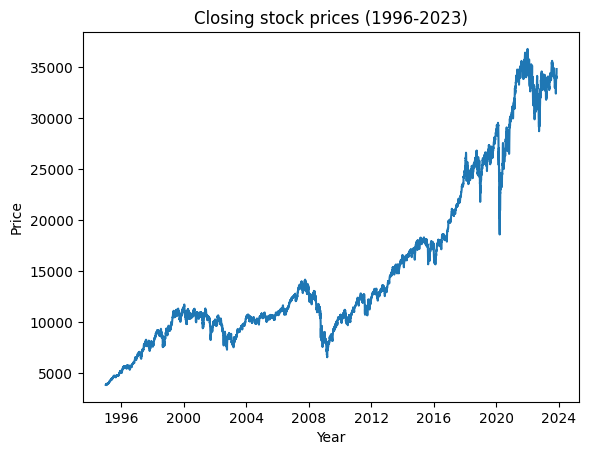

In [28]:
plt.plot(dates, dow)
_("Closing stock prices (1996-2023)","Year","Price")

### Part (b)
We will obtain the daily returns, using the formula:

$
return_t = 100 \times (\frac{Close_t}{Close_{t-1}}-1)
$

In [43]:
dailyReturns = 100*(data["Close"][1:]/list(data["Close"][:-1]) - 1)

### Part (c)
Now, to calculate the sample means of the first 100, 101, 102, etc. data points respectively...

In [44]:
means = [] # Stores the mean values per sample
for i in range(100, len(dailyReturns)): means.append(np.mean(dailyReturns[0:i]))

Plotting the above obtained means...

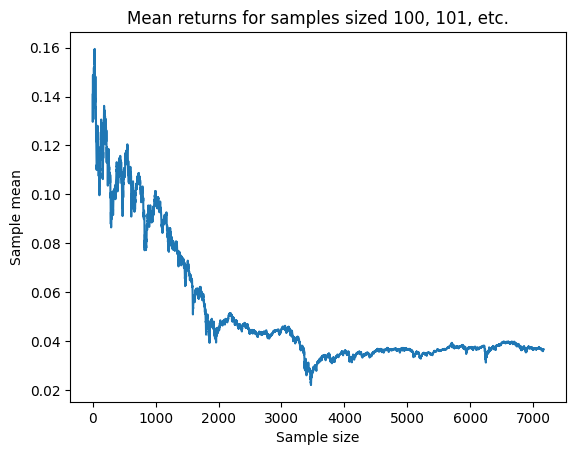

In [45]:
plt.plot(range(len(means)), means)
_("Mean returns for samples sized 100, 101, etc.","Sample size","Sample mean")

**CONCLUSIONS**:<br>**Answer**:<br>Yes, the sample means of daily returns obey the weak law of large numbers.<br><br>**Explanation**:<br>The weak law of large numbers states that given a probability distribution $P$ with mean $\mu(P)$, the probability of the mean of a sample sized $n$ from this distribution being in an arbitrarily small range around the true mean $\mu(P)$ approaches $1$ as $n$ approaches infinity. In other terms:

$
\lim_{n \rightarrow \infty} \bar{P_n}(\mu(P)-\epsilon, \mu(P)+\epsilon)=1
$

($\epsilon$ _is an arbitrary small positive value_)

This means that the sample mean is a consistent estimator of the true mean, since increasing the sample size can be expected to consistently increase the probability of narrowing down to the true mean. This means that the variance of sample means across samples decreases as sample size (for which the means are calculated) increases. This is reflected in the graph above, which shows the variation in sample means decrease as the sample size increase. Hence, it looks like the sample means of daily returns obey the weak law of large numbers.

### Part (d)
Computing length 100 & length 400 rolling averages...

In [32]:
# Efficient method using the previously calculated mean value for the next:
def get_ras(values, n):
  ra, prev, avg = [], 0, np.mean(dailyReturns[:n])
  for i in range(1, len(dailyReturns)-n):
    avg = avg - prev/n + dailyReturns[i+n-1]/n
    prev = dailyReturns[i]
    ra.append(avg)
  return ra

ra_100 = get_ras(dailyReturns, 100) # Rolling averages for samples of size 100
ra_400 = get_ras(dailyReturns, 400) # Rolling averages for samples of size 400

Plotting the rolling averages obtainable from the above function...

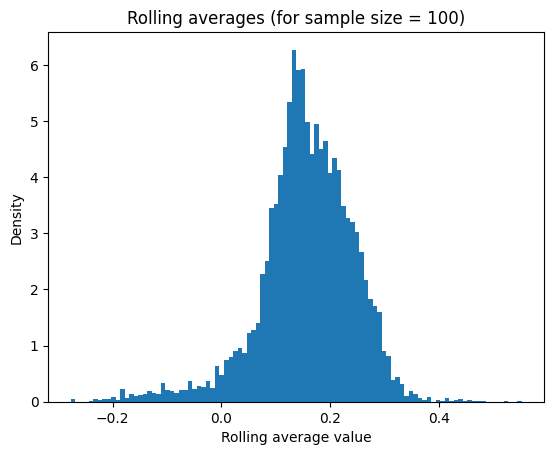

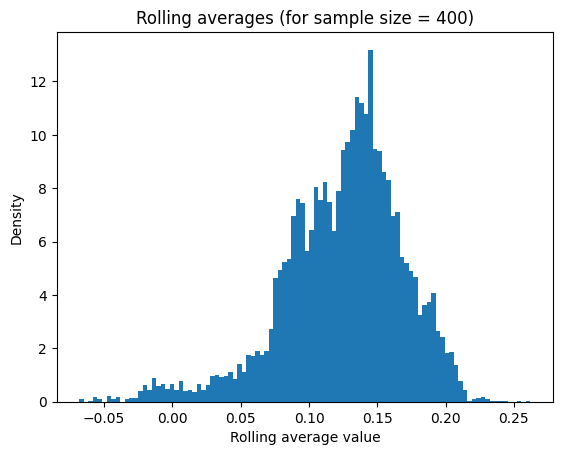

In [33]:
plt.hist(ra_100, bins=100, density=True)
_("Rolling averages (for sample size = 100)","Rolling average value","Density")

plt.hist(ra_400, bins=100, density=True)
_("Rolling averages (for sample size = 400)","Rolling average value","Density")

**CONCLUSIONS**:<br>**Answer**:<br>Yes, the above rolling sampling averages of daily returns seem to obey the central limit theorem.<br><br>**Explanation**:<br>The central limit theorem (CLT) states that the sampling distribution of a sample mean approaches normal distribution as the sample size approaches infinity, even if the population distribution is not normal. The rolling sample means calculated above show distributions that are peaked close to the mean but slightly skewed to the right (i.e. more extreme values are found toward the right). However, comparing the distributions for the means of samples sized 100 and 400 respectively, we can observe that the latter (with larger sample size) seems slightly more symmetrical, and thus, closer to normal distribution. This demonstrates (to some extent) that these sample averages obey the CLT.

### Part (e)
Computing statistics for daily returns...

In [34]:
from scipy.stats import skew, kurtosis
stats = {"Mean    ": np.mean(dailyReturns),
         "Variance": np.std(dailyReturns),
         "Skewness": skew(dailyReturns),
         "Kurtosis": kurtosis(dailyReturns)}

print("Statistics of daily returns\n---------------------------")
for s in stats: print(f"{s} : {stats[s]}")

Statistics of daily returns
---------------------------
Mean     : 0.036946718761253244
Variance : 1.1477857352809684
Skewness : -0.1619562363391253
Kurtosis : 11.933353045800521


From the above statistics, we may conclude that the distribution:

- Is centered around $0$, with a standard deviation close to 1
- Is roughly symmetrical (owing to the low-to-moderate positive skewness)
  - Positive skewness $\implies$ longer right tail<br>(_more extreme values are found above the mean_)
  - Hence, the mean exceeds the median
  - Low-to-moderate skewness may be due to sampling error
  - The density histogram below depicts a relatively symmetric curve
  - Hence, the skewness seems to be practically negligible
- Has much fatter tails than normal distribution (since kurtosis $> 3$)

---

To see this more visually, we can plot the sample distribution...

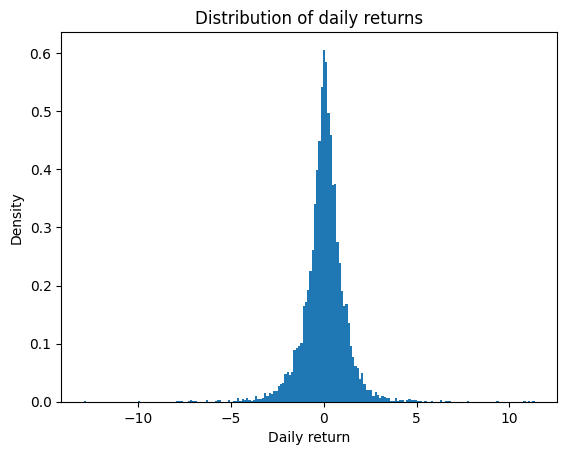

In [35]:
plt.hist(dailyReturns, bins=200, density=True)
_("Distribution of daily returns","Daily return","Density")

**CHOICE OF MODEL DISTRIBUTION**:<br>Hence, to model this distribution, we need a distribution that is symmetric yet has both fatter tails and a sharper, higher peak than a normal distribution. A family of distributions matching these criteria are Laplace distributions (_also called double exponential distributions since they are composed of two mirroring exponential distributions on either side of a threshold_). The probability density function (PDF) of a Laplace distribution is:

$
f(x)=\frac{1}{2b}e^{-\frac{| x - \mu |}{b}}
$

**Elaboration of choice**:<br>The probability density function of the Laplace distribution is similar to the normal distribution in that it involves the negative exponent of a monotonic increasing function of the input $x$. However, whereas the normal distribution is expressed in terms of the squared difference from the mean $\mu$, the Laplace density is expressed in terms of the absolute difference from the mean. Consequently, the Laplace distribution has fatter tails than the normal distribution. Furthermore, since it is defined in terms of absolute difference from the mean, the Laplace distribution tends to have a sharp peak at the mean (much sharper than the normal distribution), similar to the distribution of the daily returns we saw in the previous graph. These two factors together lead to the selection of Laplace distributions as the family of distributions to model daily returns.
<br><br>
**SIDE NOTE**: The density being expressed in terms of the absolute difference from the mean results in fatter tails because the square of a value grows much larger than the value's magnitude, which means as $x-\mu$ increases, its square increases much faster than its magnitude, and consequently, a function containing $e^{-|x-\mu|}$ tends to decrease slower than a function containing $e^{-(x-\mu)^2}$ as $x$ moves further from the mean, leading to thinner tails for the former and fatter tails for the latter.

---

**NOTE**: **Alternatives to Laplace**:

The following functions are more fat-tailed than the normal distribution and are/can be relatively symmetrical:

- Hyperbolic distribution (too complicated)
- Gamma distribution (less peaked)

> REFERENCES:
> - https://en.wikipedia.org/wiki/Laplace_distribution
> - https://www.statisticshowto.com/laplace-distribution-double-exponential/

---

Plotting the Laplace distribution for visual reference...

In [36]:
from scipy.stats import laplace

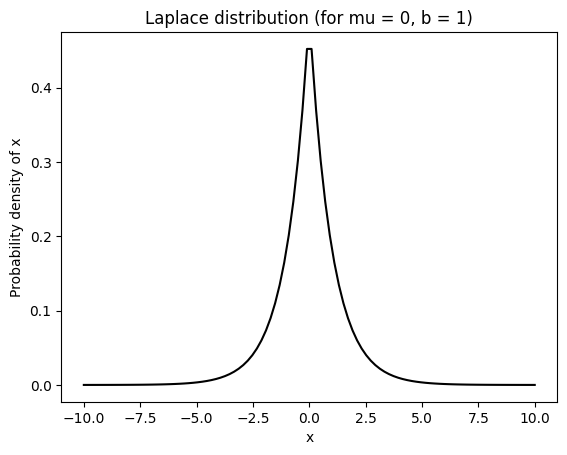

In [37]:
x = np.linspace(-10, 10, 100)
plt.plot(x, laplace.pdf(x, loc=0, scale=1), color="black")
_("Laplace distribution (for mu = 0, b = 1)","x","Probability density of x")

### Part (f)

Optimising the parameters $\mu$ and $b$ (the `loc` and `scale` parameters respectively, in the implementation)...

In [38]:
from scipy.optimize import minimize

**The function to be optimised**:<br>The function to be optimised (maximised, in this case) is the negative of the maximum likelihood estimator (MLE), given by:

$
log(\prod_{i=0}^N f_\Theta(x_i)) =
\sum_{i=1}^N \log{f_\Theta(x_i)}
$

where:

- $x_0, x_1 ... x_N$ is the sample
- $f_\Theta(x_i)$ is the probability density function (PDF) for each point $x_i$
- $\Theta$ is the set of parameters involved in the function
- We must optimise (i.e. maximise, in this case) for each parameter in $\Theta$

---

**The keys to optimisation**:

- A local optimum of a function $f$ with respect to parameter $\theta$ is where $\frac{\delta f}{\delta \theta}=0$
- The optimal points (minima and maxima) in $\log F$ (where $F$ is a function) are the same as they are for $F$

---

**Possible issues with optimisation**:

- The optimisation may be stuck at a local optimum rather than a global optimum
- The function to be optimised may not be differentiable at key points

---

**Translating a maximisation process into a minimisation one**:<br>We shall be using the function `scipy.minimize`, which aims to minimise a given function with respect to the given parameters of the function. However, what we have is the MLE, which must be maximised to obtain the best estimates for each parameter (i.e. the best fit of the theoretical distribution to the data). Hence, we shall simply aim to minimise the negative of the MLE (thereby maximising MLE itself).

In [39]:
# Function to maximise (MLE):
MLE = lambda args, x: sum(np.log(laplace.pdf(x, loc=args[0], scale=args[1])))
# Function to thus minimise:
g = lambda args, x: -MLE(args, x)
# NOTE: MLE is only implemented for conceptual clarity

#================================================

"""
Note on the initial values of the parameters:
The parameter b cannot be negative or zero (not negative, since that would
change the shape of the curve, not negative since we would get a division by
zero in the PDF). From the above graphs, we can see that b may be close to 1,
but must be smaller (to obtain a higher peak). Hence, we shall initialise b as
0.5. As for the parameter mu (the mean), we see that the mean is close to zero,
so we simply initialise it as 0.
"""
r = minimize(g, [0, 0.5], args=dailyReturns)
print(r["message"] + "\n")
print(f"Optimisation success    : {r['success']}")
print(f"Final value of function : {r['fun']:.4f}")
print(f"Optimised values        : loc={r['x'][0]:.4f}, scale={r['x'][1]:.4f}")

Desired error not necessarily achieved due to precision loss.

Optimisation success    : False
Final value of function : 10350.8248
Optimised values        : loc=0.0552, scale=0.7642


Plotting the Laplace distribution curve (with the above obtained parameters) on top of the density histogram of daily returns...

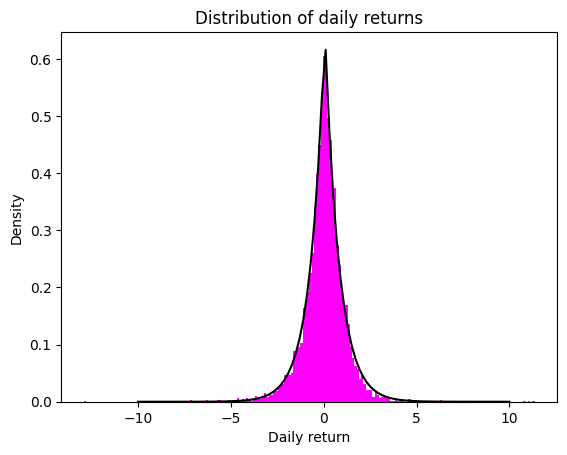

In [40]:
x = np.linspace(-10, 10, 100)
plt.hist(dailyReturns, bins=200, density=True, color="magenta")
plt.plot(x, laplace.pdf(x, loc=r["x"][0], scale=r["x"][1]), color="black")
_("Distribution of daily returns","Daily return","Density")

### Part (g)

Fitting the parameters using the `.fit` function (applicable for `rv_continuous` objects, such as `stats.scipy.laplace`)...

In [41]:
loc, scale = laplace.fit(dailyReturns)
print(f"Fit parameters: loc={loc:.4f}, scale={scale:.4f}")

Fit parameters: loc=0.0552, scale=0.7642


The same results for both parameters are obtained as last time. Hence, we get the same graph as last time...

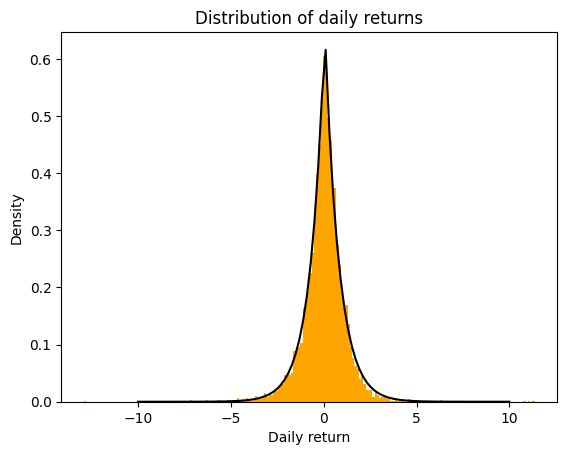

In [42]:
x = np.linspace(-10, 10, 100)
plt.hist(dailyReturns, bins=200, density=True, color="orange")
plt.plot(x, laplace.pdf(x, loc=loc, scale=scale), color="black")
_("Distribution of daily returns","Daily return","Density")